# Task 1: Student Pass/Fail Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# Load dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\student_performance_dataset.csv")

In [4]:
# Convert target variable to binary
df['Pass_Fail'] = df['Pass_Fail'].map({'Pass': 1, 'Fail': 0})

In [5]:
# Select relevant columns
df = df[['Study_Hours', 'Attendance', 'Pass_Fail']]

In [6]:
# Check for missing values
df.dropna(inplace=True)

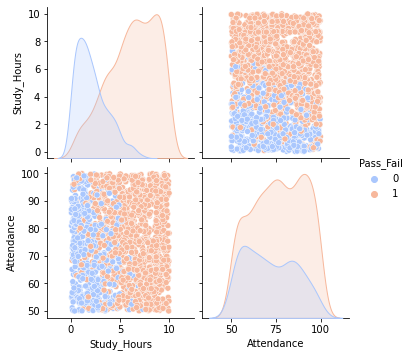

In [7]:
# Visualize data
sns.pairplot(df, hue='Pass_Fail', palette='coolwarm')
plt.show()

In [8]:
# Split data into train and test sets
X = df[['Study_Hours', 'Attendance']]
y = df['Pass_Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
# Make predictions
y_pred = model.predict(X_test)

In [12]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [13]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.85
Confusion Matrix:
 [[ 76  20]
 [ 24 180]]


Conclusion Based on Model Performance

Accuracy:
The model achieved 85% accuracy, meaning it correctly predicted whether a student passes or fails in 85 out of 100 cases.
This indicates that study hours and attendance are strong predictors of student performance.

Confusion Matrix Interpretation:
True Positives (TP = 180): Students who actually passed and were correctly predicted as passing.
True Negatives (TN = 76): Students who actually failed and were correctly predicted as failing.
False Positives (FP = 20): Students who failed but were incorrectly predicted as passing.
False Negatives (FN = 24): Students who passed but were incorrectly predicted as failing.

# Task 2: Sentiment Analysis with Natural Language Processing

In [14]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


True

In [16]:
# Load dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\reviews (1).csv")

In [18]:
df.head()

,Review Text,Sentiment
0,Great product! Highly recommended.,Positive
1,Very happy with my purchase.,Positive
2,"Awful, just awful.",Positive
3,"Amazing quality, exceeded my expectations.",Negative
4,I regret buying this.,Negative


In [19]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

In [20]:
# Apply preprocessing
df['Cleaned_Review'] = df['Review Text'].apply(preprocess_text)

In [21]:
# Convert sentiment labels to binary
df['Sentiment'] = df['Sentiment'].map({'Positive': 1, 'Negative': 0})

In [22]:
# Split data
X = df['Cleaned_Review']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [24]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [25]:
# Make predictions
y_pred = model.predict(X_test_tfidf)

In [26]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [27]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.53
Precision: 0.76
Recall: 0.46
F1-Score: 0.58
Confusion Matrix:
 [[ 8  4]
 [15 13]]


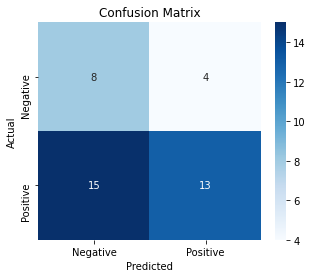

In [28]:
# Visualize confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Conclusion Based on Model Performance
Accuracy (53%) – The model correctly classifies sentiments 53% of the time, which is low and suggests room for improvement.

Precision (76%) – When the model predicts Positive, it's correct 76% of the time, indicating it avoids many false positives.

Recall (46%) – The model only captures 46% of actual positive reviews, meaning it's missing many true positives.

F1-Score (58%) – A balance of precision and recall, showing moderate performance.

Confusion Matrix Insights:

8 True Negatives (TN) – Correctly classified negative reviews.

13 True Positives (TP) – Correctly classified positive reviews.

4 False Positives (FP) – Negative reviews misclassified as positive.

15 False Negatives (FN) – Positive reviews misclassified as negative (a major issue).